In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("World-happiness-report-2024.csv")

PART 1

In [45]:
df.shape

(143, 12)

In [46]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [47]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.dropna(inplace=True)

In [49]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.530893,5.644057,5.417700,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.181247,1.165108,1.198051,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.631750,4.762250,4.503750,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.800500,5.911000,5.676500,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.426250,6.515250,6.338250,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [52]:
df["Country name"].nunique()

140

In [53]:
df["Regional indicator"].nunique()

10

In [54]:
#happiest country
df[["Ladder score","Country name"]].sort_values(by="Ladder score", ascending=False).head(1)

,Ladder score,Country name
0,7.741,Finland


In [55]:
#common region
df["Regional indicator"].value_counts().head(1)

Regional indicator
Sub-Saharan Africa    35
Name: count, dtype: int64

PART 2

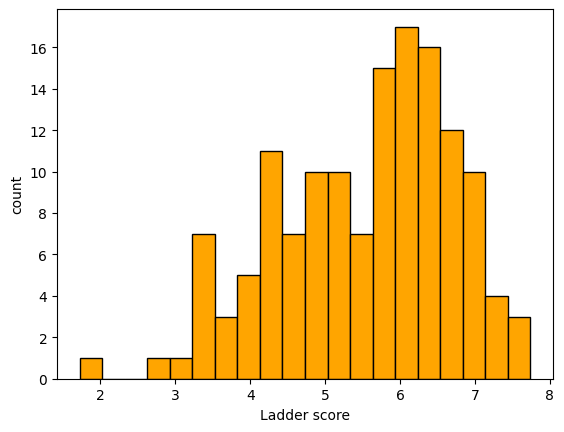

In [56]:
import matplotlib.pyplot as plt
plt.hist(df["Ladder score"],color="orange",edgecolor="black",bins=20)
plt.xlabel("Ladder score")
plt.ylabel("count")
plt.show()

In [57]:
#top 10 happiest countries
df[["Country name","Ladder score"]].sort_values(by="Ladder score",ascending=False).head(10)

,Country name,Ladder score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
5,Netherlands,7.319
6,Norway,7.302
7,Luxembourg,7.122
8,Switzerland,7.060
9,Australia,7.057


In [58]:
#Find the bottom 10 countries by happiness score.
df[["Country name","Ladder score"]].sort_values(by="Ladder score").head(10)

,Country name,Ladder score
142,Afghanistan,1.721
141,Lebanon,2.707
140,Lesotho,3.186
139,Sierra Leone,3.245
138,Congo (Kinshasa),3.295
137,Zimbabwe,3.341
136,Botswana,3.383
135,Malawi,3.421
133,Zambia,3.502
134,Eswatini,3.502


In [59]:
#Create a bar chart showing average happiness score per region.
avg_happiness=df.groupby("Regional indicator")["Ladder score"].mean()
avg_happiness

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.567111
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.170733
North America and ANZ                 6.927750
South Asia                            3.895667
Southeast Asia                        5.551889
Sub-Saharan Africa                    4.329686
Western Europe                        6.841650
Name: Ladder score, dtype: float64

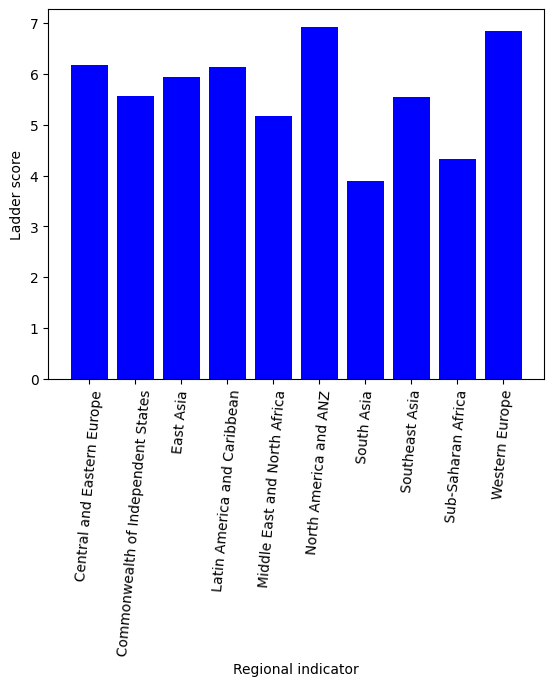

In [60]:
plt.bar(avg_happiness.index,avg_happiness.values,color="blue")
plt.xlabel("Regional indicator")
plt.xticks(rotation=85)
plt.ylabel("Ladder score")
plt.show()

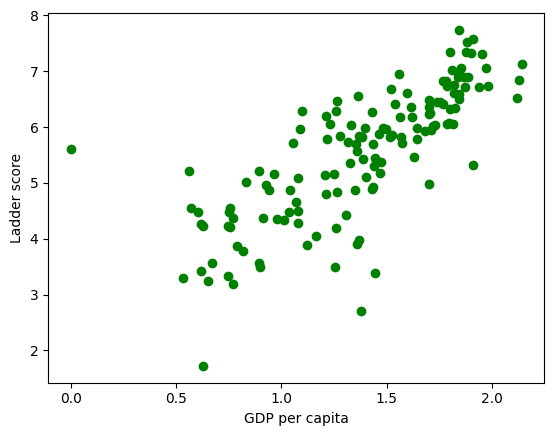

In [61]:
#Scatter plot: GDP per capita vs Happiness score.
plt.scatter(df["Log GDP per capita"],df["Ladder score"],color="green")
plt.xlabel("GDP per capita")
plt.ylabel("Ladder score")
plt.show()

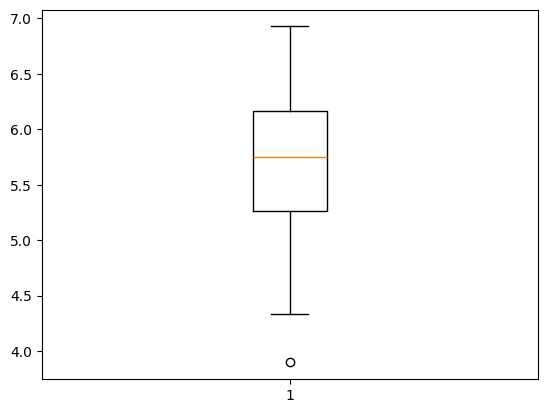

In [62]:
#Boxplot of happiness scores grouped by region.
plt.boxplot(avg_happiness)
plt.show()

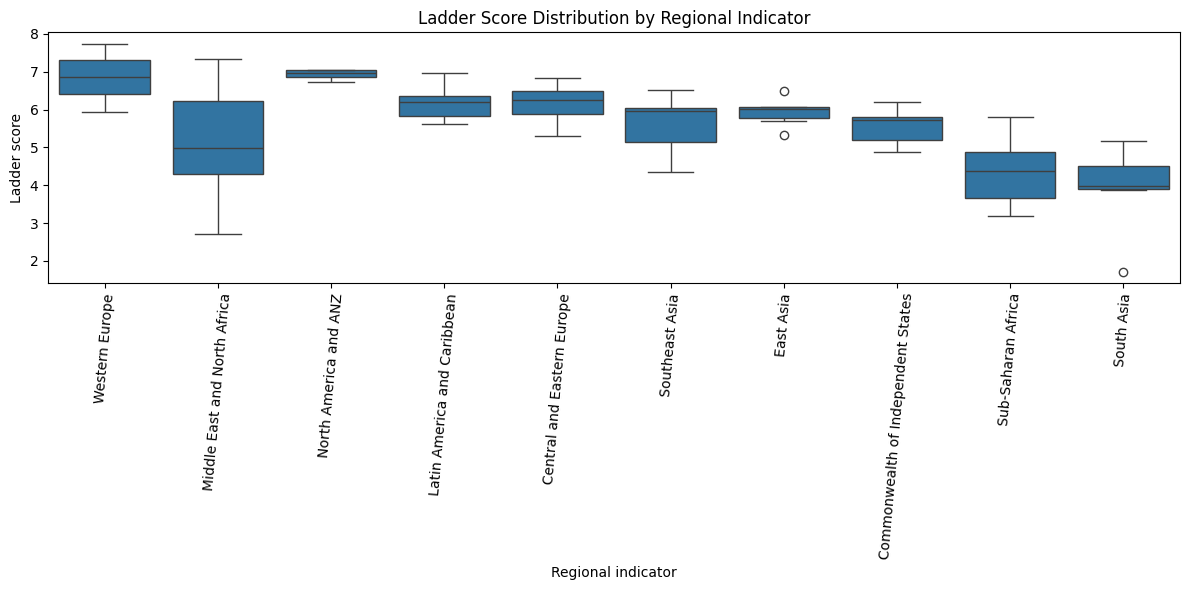

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="Regional indicator", y="Ladder score", data=df)
plt.xticks(rotation=85)
plt.xlabel("Regional indicator")
plt.ylabel("Ladder score")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.tight_layout()
plt.show()

PART 3

In [64]:
#mean, median, variance, std deviation
print(df["Ladder score"].mean())
print(df["Ladder score"].median())
print(df["Ladder score"].var())
print(df["Ladder score"].std())

5.530892857142858
5.8004999999999995
1.3953441539054463
1.1812468640827989


In [65]:
#mode
print(df["Ladder score"].mode())

0    3.502
1    5.816
2    6.188
Name: Ladder score, dtype: float64


In [66]:
#total countries
total_countries=df['Country name'].value_counts().sum()
print(total_countries)

140


In [67]:
print(df.shape[0])

140


In [68]:
countries_below_avg=df[df["Ladder score"]<df["Ladder score"].mean()].shape[0]
print(countries_below_avg)

61


In [69]:
#percentage of countries below avg ladder score
percentage=(countries_below_avg/total_countries)*100
print(percentage)

43.57142857142857


In [70]:
#Most common region among top 20 countries by happiness.
top_20_countries = df.sort_values(by="Ladder score", ascending=False).head(20)
most_common_region_in_top_20 = top_20_countries["Regional indicator"].value_counts().head(1)
display(most_common_region_in_top_20)

Regional indicator
Western Europe    12
Name: count, dtype: int64

PART 5

In [71]:
#well being index
import sympy as sp
#x=Happiness, y=GDP
x,y=sp.symbols("x,y")
Well_Index=(x*y)+0.5*(x-5)**2
sp.diff((x*y)+0.5*(x-5)**2,x)

1.0*x + y - 5.0

PART 6

In [72]:
df['is_happy'] = (df['Ladder score'] > 7).astype(int)
display(df.head(10))

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,is_happy
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,1
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,1
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,1
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,1
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,1
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745,1


In [73]:
happiness_rank=df[["Country name","Regional indicator","Ladder score"]].sort_values(by="Ladder score",ascending=False)
happiness_rank

,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.741
1,Denmark,Western Europe,7.583
2,Iceland,Western Europe,7.525
3,Sweden,Western Europe,7.344
4,Israel,Middle East and North Africa,7.341
...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295
139,Sierra Leone,Sub-Saharan Africa,3.245
140,Lesotho,Sub-Saharan Africa,3.186
141,Lebanon,Middle East and North Africa,2.707


In [74]:
df["above_average_gdp"]=(df["Log GDP per capita"]>df["Log GDP per capita"].mean()).astype(int)
df[["Country name","above_average_gdp"]]

,Country name,above_average_gdp
0,Finland,1
1,Denmark,1
2,Iceland,1
3,Sweden,1
4,Israel,1
...,...,...
138,Congo (Kinshasa),0
139,Sierra Leone,0
140,Lesotho,0
141,Lebanon,0


In [75]:
import pandas as pd
df["Healthy life expectancy quartiles"]=pd.qcut(df["Healthy life expectancy"],q=4,labels=False)
df[["Country name","Healthy life expectancy quartiles"]]

,Country name,Healthy life expectancy quartiles
0,Finland,3
1,Denmark,3
2,Iceland,3
3,Sweden,3
4,Israel,3
...,...,...
138,Congo (Kinshasa),0
139,Sierra Leone,0
140,Lesotho,0
141,Lebanon,2


PART 7

In [76]:
#Select all countries with happiness score > 7.
happy_countries=df[df["Ladder score"]>7]
happy_countries[["Ladder score","Country name"]]

,Ladder score,Country name
0,7.741,Finland
1,7.583,Denmark
2,7.525,Iceland
3,7.344,Sweden
4,7.341,Israel
5,7.319,Netherlands
6,7.302,Norway
7,7.122,Luxembourg
8,7.060,Switzerland
9,7.057,Australia


In [77]:
#Select all countries with happiness score > 7.
df['Log GDP per capita'].sort_values(ascending=False)

7      2.141
16     2.129
29     2.118
21     1.983
8      1.970
       ...  
112    0.603
108    0.573
89     0.560
138    0.534
78     0.000
Name: Log GDP per capita, Length: 140, dtype: float64

In [78]:
regional_happiness=df.groupby("Regional indicator")['Ladder score'].mean()
regional_happiness

Regional indicator
Central and Eastern Europe            6.170941
Commonwealth of Independent States    5.567111
East Asia                             5.934333
Latin America and Caribbean           6.143368
Middle East and North Africa          5.170733
North America and ANZ                 6.927750
South Asia                            3.895667
Southeast Asia                        5.551889
Sub-Saharan Africa                    4.329686
Western Europe                        6.841650
Name: Ladder score, dtype: float64

In [79]:
regional_happiness.sort_values(ascending=False).head()

Regional indicator
North America and ANZ          6.927750
Western Europe                 6.841650
Central and Eastern Europe     6.170941
Latin America and Caribbean    6.143368
East Asia                      5.934333
Name: Ladder score, dtype: float64

In [80]:
health_expectancy=df[df['Healthy life expectancy']*100>70]
health_expectancy[["Country name","Healthy life expectancy"]]

,Country name,Healthy life expectancy
2,Iceland,0.718
3,Sweden,0.724
4,Israel,0.740
5,Netherlands,0.706
6,Norway,0.704
7,Luxembourg,0.708
8,Switzerland,0.747
14,Canada,0.701
23,Germany,0.702
26,France,0.727


PART 8

In [81]:
#Which country is the happiest?
happy_countries[['Country name','Ladder score']].head(1)


,Country name,Ladder score
0,Finland,7.741


In [82]:
#Which region is the happiest on average?
regional_happiness.sort_values(ascending=False).head(1)

Regional indicator
North America and ANZ    6.92775
Name: Ladder score, dtype: float64

In [83]:
#Is GDP per capita strongly correlated with happiness?
df['Log GDP per capita'].corr(df['Ladder score'])

np.float64(0.768503682450489)

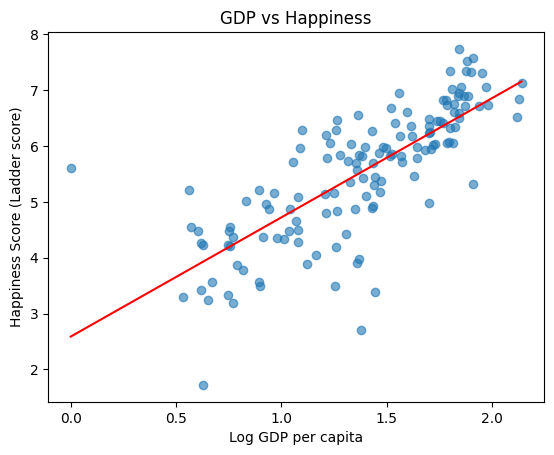

In [84]:
import matplotlib.pyplot as plt
import numpy as np

df_cleaned = df.dropna(subset=['Log GDP per capita', 'Ladder score'])

avg_happiness_cleaned = df_cleaned.groupby('Country name')[['Log GDP per capita', 'Ladder score']].mean()

plt.scatter(avg_happiness_cleaned['Log GDP per capita'], avg_happiness_cleaned['Ladder score'], alpha=0.6)
plt.plot(np.unique(avg_happiness_cleaned['Log GDP per capita']), np.poly1d(np.polyfit(avg_happiness_cleaned['Log GDP per capita'], avg_happiness_cleaned['Ladder score'], 1))(np.unique(avg_happiness_cleaned['Log GDP per capita'])), color='red')

plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('GDP vs Happiness')
plt.show()

In [85]:
#highest avg life expectancy
df.groupby('Regional indicator')['Healthy life expectancy'].mean().idxmax()

'Western Europe'